In [18]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import pickle

In [46]:
# load dataset
#df = pd.read_csv("datasets/bbc-text.csv") # src: https://www.kaggle.com/c/learn-ai-bbc
df = pd.read_csv("datasets/20_newsgroup.csv") # src: http://qwone.com/~jason/20Newsgroups/
#df = pd.read_csv("datasets/news_headlines.csv") # src: https://www.kaggle.com/datasets/rmisra/news-category-dataset

df = df.astype(str)
#df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(1000)) # stratify -- take x elements of each category
df.head()

,text,category
0,I was wondering if anyone out there could enli...,rec.autos
1,I recently posted an article asking what kind ...,rec.autos
2,\nIt depends on your priorities. A lot of peo...,rec.autos
3,an excellent automatic can be found in the sub...,rec.autos
4,: Ford and his automobile. I need information...,rec.autos


rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: category, dtype: int64


p:\python_projects\searchingsystems\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


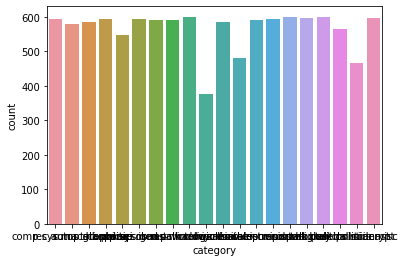

In [35]:
sns.countplot(df.category) # generate class plot
print(df['category'].value_counts()) # print count for each class

p:\python_projects\searchingsystems\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Article length distribution')

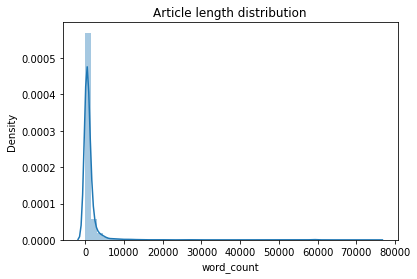

In [7]:
# count number of words in each article

df['word_count'] = df['text'].str.len()
sns.distplot(df['word_count']).set_title('Article length distribution')

In [ ]:
# generate word cloud for each class

def create_wordcloud(words, title):
    wordcloud = WordCloud(width=500, height=500).generate(words)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.show()

for category in pd.unique(df['category']):
    category_df = df.loc[df['category'] == category]
    txt = ' '.join(category_df.text)
    create_wordcloud(txt, category)

In [47]:
def clean_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip() # remove special characters
    text = re.sub(' +', ' ', text) # remove multiple whitespaces
    text = re.sub(r'[^\w\s]', '', text) # remove non-letter characters
    # removing stopwords could be added here
    return text

df['text'] = df['text'].apply(clean_text)
df['word_count'] = df['text'].str.len()
df.head()

,text,category,word_count
0,i was wondering if anyone out there could enli...,rec.autos,456
1,i recently posted an article asking what kind ...,rec.autos,7651
2,it depends on your priorities a lot of people ...,rec.autos,439
3,an excellent automatic can be found in the sub...,rec.autos,1925
4,ford and his automobile i need information on...,rec.autos,341


In [48]:
X = list(df['text'])
y = list(df['category'])
print(y[:3])

['rec.autos', 'rec.autos', 'rec.autos']


In [49]:
# label encoding

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y[:3])

[7 7 7]


In [50]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .8, random_state = 1410)
print(f'train: {len(X_train)}, test: {len(X_test)}')

train: 9051, test: 2263


In [51]:
# TFIDF
# TF = count of specific word in article / number of words in article
# IDF = log(number of articles containing specific word / number of articles)
# TFIDF = TF * IDF -- for each article

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [40]:
# Bag-of-Words
count_vectorizer = CountVectorizer(analyzer='word', stop_words='english')
X_train = count_vectorizer.fit_transform(X_train).toarray()
X_test = count_vectorizer.transform(X_test).toarray()

In [ ]:
# TODO:
# Word2Vec

In [ ]:
lr_model = LogisticRegression(multi_class="multinomial")
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

models = [lr_model, rf_model, knn_model]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__)
    print(classification_report(y_test,y_pred))

In [52]:
from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier()


mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
print(type(mlp_model).__name__)
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))


MLPClassifier
              precision    recall  f1-score   support

           0       0.65      0.64      0.65        81
           1       0.64      0.60      0.62       120
           2       0.60      0.65      0.63       130
           3       0.59      0.60      0.59       109
           4       0.76      0.72      0.74       134
           5       0.79      0.74      0.76       120
           6       0.74      0.76      0.75       111
           7       0.64      0.75      0.69       138
           8       0.77      0.68      0.72       120
           9       0.65      0.82      0.72       133
          10       0.89      0.79      0.84       130
          11       0.86      0.85      0.85       107
          12       0.63      0.71      0.67       118
          13       0.80      0.80      0.80        98
          14       0.85      0.73      0.79       120
          15       0.73      0.77      0.75       114
          16       0.79      0.73      0.76       121
          17 

In [53]:
# save MLP model to file
pickle.dump(mlp_model, open('mlp_model.pkl', 'wb'))

In [65]:
# testing the MLP model on own dataset
saved_model = pickle.load(open('mlp_model.pkl', 'rb'))

test_df = pd.read_csv('datasets/nasz.csv', delimiter=';')
test_df = test_df.astype(str)

test_df['text'] = test_df['text'].apply(clean_text)
test_df['word_count'] = test_df['text'].str.len()

test_X = list(test_df['text'])
test_y = list(test_df['category'])

test_X = tfidf.transform(test_X).toarray()

# test_X= count_vectorizer.transform(test_X).toarray()

pred = saved_model.predict(test_X)

print('actual:')
print(test_y)

print('predicted:')
print(label_encoder.inverse_transform(pred))

actual:
['rec.sport.hockey', 'talk.politics.guns', 'rec.sport.baseball', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'rec.autos', 'talk.politics.misc', 'talk.religion.misc']
predicted:
['rec.sport.hockey' 'talk.politics.guns' 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'sci.med' 'rec.autos' 'talk.politics.mideast'
 'talk.politics.mideast']
